<a href="https://colab.research.google.com/github/dk-tran92/ML/blob/main/Nhan_dang_mau_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bayesian Linear Regression with Pyro
##Install Pyro

In [1]:
!pip install pyro-ppl

     |████████████████████████████████| 713 kB 5.5 MB/s 


##Related Libraries

In [2]:
import time         # We will time our execution often

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load Database

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

print(f'Data shape is {X.shape}')
print(f'Target shape is {y.shape}')

Data shape is (442, 10)
Target shape is (442,)


##Data Description
"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n=442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

- 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements
- Response: a quantitative measure of disease progression after 1 year

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
diabetes.target[0]

151.0

In [7]:
features_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


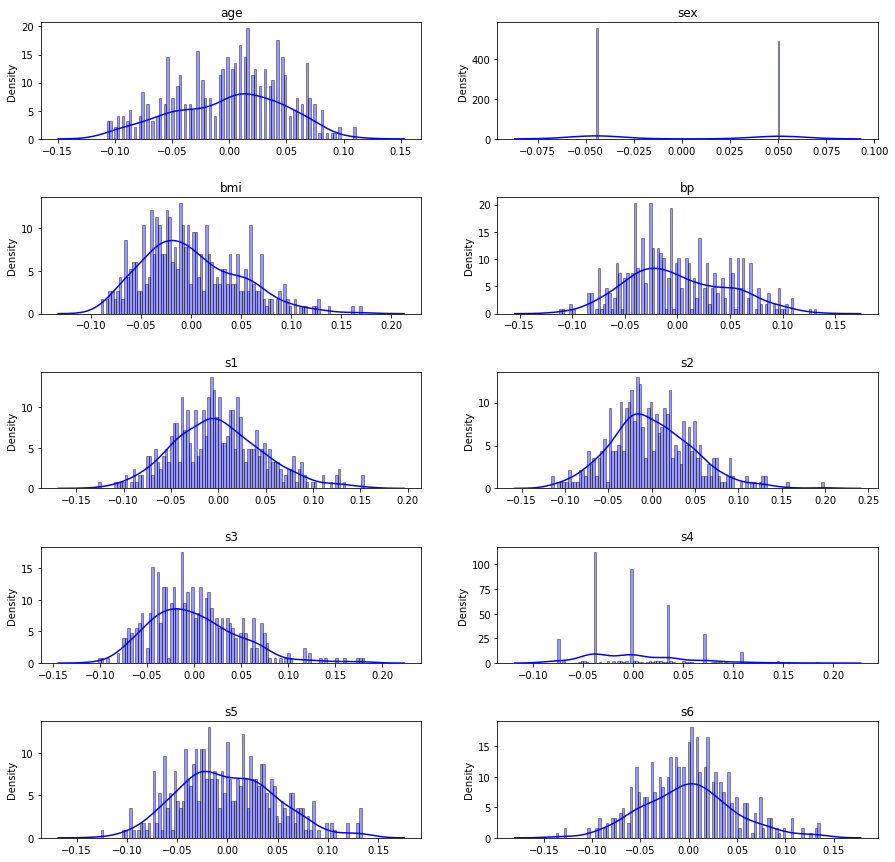

In [8]:
def draw_features(features_df):
    figure, axis = plt.subplots(5,2, figsize=(15,15))


    for key, ax in zip(features_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(features_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_features(features_df)

In [9]:
diabetes.data[:,1]*10+0.5

array([1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       0.05358363, 1.00680119, 0.05358363, 0.05358363, 0.05358363,
       0.05358363, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 1.00680119, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 0.05358363, 1.00680119, 1.00680119, 1.00680

Text(0.5, 1.0, 'Distribution of sex')

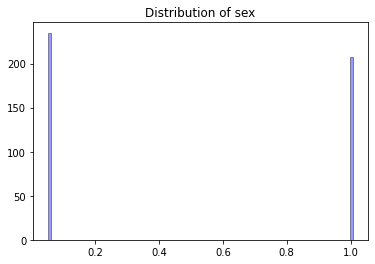

In [10]:
sns.distplot(diabetes.data[:,1]*10+0.5,
              bins=100, 
              color="blue", 
              kde=False, 
              axlabel=False, 
              hist_kws=dict(edgecolor="black"))
plt.title("Distribution of sex")


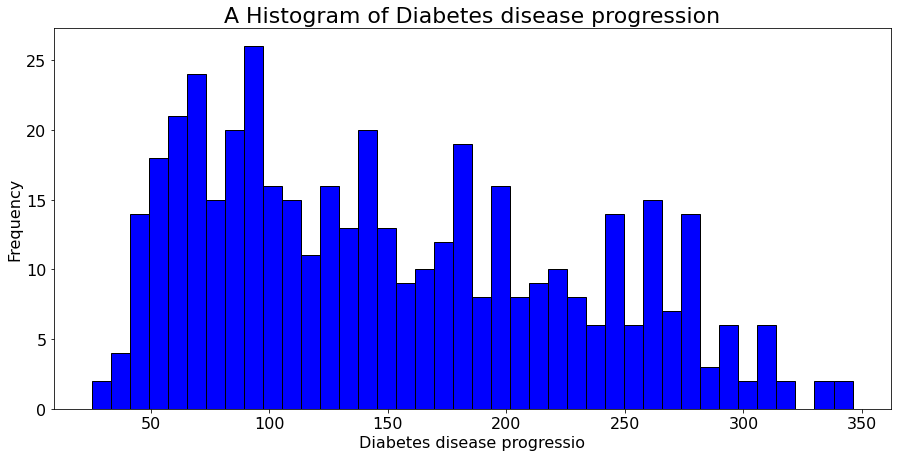

In [11]:
plt.figure(figsize=(15,7))
plt.hist(y, bins=40, color="blue", edgecolor="black")
plt.xlabel("Diabetes disease progressio", size=16)
plt.ylabel("Frequency", size=16)
plt.title("A Histogram of Diabetes disease progression", size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

Ta thấy dạng phân phối của y không phải là phân phối chuẩn mà có vẻ như là một phân phối Gamma (dương và bị lệch)

##Train test split


In [12]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


##Tradiational Linear Regression

In [13]:
# start timing
start_time = time.time()

# fit linear regression
my_linear_regression = LinearRegression().fit(X_train,y_train)
y_pred = my_linear_regression.predict(X_test)

end_time = time.time()

# print point estimates of the coefficients
print(f"beta_intercept: {round(my_linear_regression.intercept_, 2)}")
for i, col in enumerate(diabetes.feature_names):
    print(f"beta_{col}: {round(my_linear_regression.coef_[i], 2)}")

beta_intercept: 151.54
beta_age: -10.46
beta_sex: -272.96
beta_bmi: 523.35
beta_bp: 322.99
beta_s1: -638.57
beta_s2: 364.02
beta_s3: 31.42
beta_s4: 200.05
beta_s5: 592.97
beta_s6: 135.53


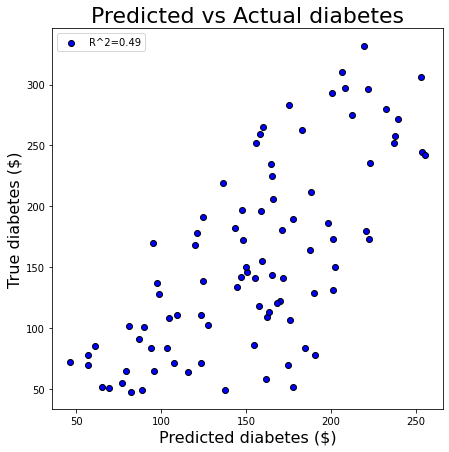

In [14]:
def plot_all_observations(y_true, y_pred, y_max):
    
    y_pred_censored = np.where(y_pred > y_max, y_max, y_pred)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(y_pred_censored, y_test, 
                c="blue", edgecolor="black", 
                label=f'R^2={round(r2_score(y_test, y_pred_censored),2)}')
    
    plt.title("Predicted vs Actual diabetes", size=22)
    plt.xlabel("Predicted diabetes ($)", size=16)
    plt.ylabel("True diabetes ($)", size=16)
    plt.ticklabel_format(style='plain')
    plt.legend()
    
    plt.show()
    
    
    
# Now let's call our function
y_censor_label = y_train.max()
plot_all_observations(y_test, y_pred, y_censor_label)

# Bayesion Linear Regression with Pyro


In [15]:
# import all required Pyro/Pytorch libraries
import torch
torch.set_default_tensor_type(torch.FloatTensor) # set the default to float32

import pyro
import pyro.distributions as dist

# We will use Markov Chain Monte Carlo (MCMC) methods here, specifically the No U-Turn Sampler (NUTS)
from pyro.infer import MCMC, NUTS

In [16]:
def model_normal(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        coefficient_prior = dist.Normal(0.0, 1.0)
        beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
        linear_combination = linear_combination + (X[:, i] * beta_coef)
    
    
    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.HalfNormal(scale=10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [17]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 353 samples. 
# Then discard the first 53
my_mcmc1 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc1.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 406/406 [01:51,  3.66it/s, step size=1.57e-01, acc. prob=0.946]


Inference ran for 1.85 minutes


In [18]:
my_mcmc1.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age     -0.02      0.93      0.02     -1.64      1.35    472.63      1.01
        beta_bmi      0.08      1.04      0.06     -1.67      1.59    319.45      1.00
         beta_bp      0.06      0.87     -0.01     -1.16      1.75    340.42      1.00
  beta_intercept      2.83      0.93      2.80      1.42      4.24    471.34      1.00
         beta_s1      0.02      1.05      0.06     -1.62      1.53    358.22      1.00
         beta_s2      0.06      1.05      0.13     -1.79      1.57    602.59      1.00
         beta_s3     -0.02      1.03     -0.00     -1.50      1.85    563.43      1.00
         beta_s4     -0.03      0.92     -0.09     -1.52      1.39    518.96      1.00
         beta_s5      0.02      1.04     -0.01     -1.68      1.60    572.43      1.00
         beta_s6     -0.01      1.00      0.04     -1.78      1.45    506.71      1.00
        beta_sex      0.03      0.92      

In [19]:
beta_df = pd.DataFrame(my_mcmc1.get_samples())
beta_df.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,1.793315,-0.297399,1.787775,0.446272,-0.507667,0.575459,0.712182,0.598330,1.309025,0.453095,0.217043,135.669635
1,-1.638186,0.426188,0.224617,0.310921,0.913430,-0.227893,-0.800911,-1.018359,0.622139,0.029690,0.434065,138.203309
2,1.185327,0.063834,0.155074,4.632099,-0.314990,1.098396,0.439720,-0.348597,-1.316901,-1.206419,-0.566183,133.403408
3,0.899278,0.249987,-0.242340,4.663907,0.056817,1.456724,0.332664,-0.379044,-0.697117,-1.151893,-0.332090,136.335403
4,2.200164,1.065978,-1.430942,4.933845,0.285772,0.744734,1.191988,-0.449173,-0.624651,-1.430989,-0.726330,135.256424


In [20]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [21]:
linear_combination = predict_linear_combination(beta_df, X_test)
# Our predictions are the linear combination
y_pred = linear_combination

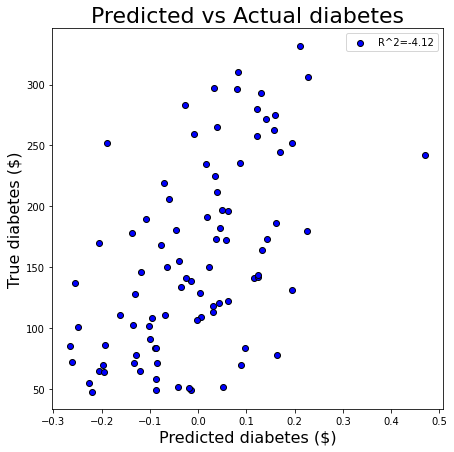

In [22]:
plot_all_observations(y_test, y_pred, y_censor_label)

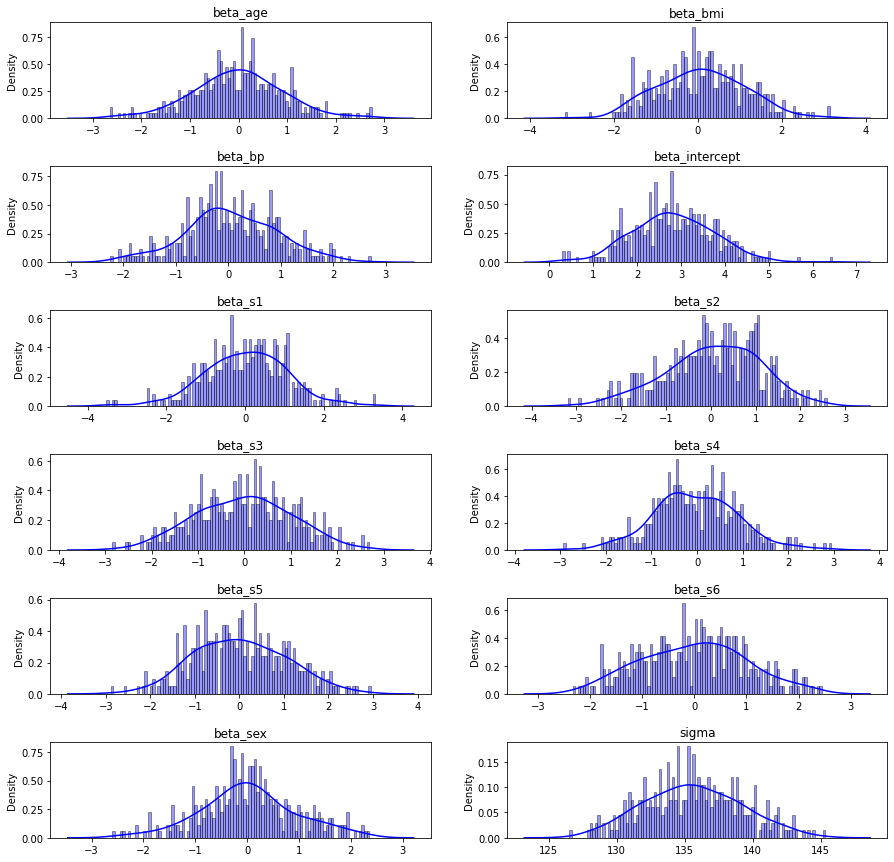

In [23]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df)

##Sample only 100 samples

In [24]:
SAMPLE_NUMBER = 100


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 100 samples. 
# Then discard the first 10
my_mcmc2 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=10)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc2.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 110/110 [01:18,  1.40it/s, step size=2.94e-03, acc. prob=0.999]


Inference ran for 1.31 minutes


In [25]:
my_mcmc2.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.75      0.37      0.75      0.10      1.26      5.93      1.42
        beta_bmi     -0.70      1.03     -0.85     -1.99      1.15      2.88      2.02
         beta_bp      1.44      0.42      1.56      0.74      2.06      4.70      1.39
  beta_intercept      1.49      1.22      1.89     -0.84      2.76      3.65      1.60
         beta_s1      0.42      0.59      0.47     -0.50      1.30      5.06      1.30
         beta_s2     -0.99      0.65     -1.19     -1.80      0.38      3.89      1.46
         beta_s3      0.38      0.55      0.40     -0.39      1.32      7.80      1.29
         beta_s4     -0.39      0.54     -0.34     -1.43      0.37      5.74      1.65
         beta_s5     -0.19      0.54     -0.23     -1.13      0.65      6.18      1.02
         beta_s6      0.72      1.06      1.14     -1.07      1.95      3.24      1.80
        beta_sex     -0.88      0.59     -

In [26]:
beta_df_2 = pd.DataFrame(my_mcmc2.get_samples())
beta_df_2.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,0.272022,1.164071,0.382800,-1.418182,0.351580,-1.316572,0.647734,-1.371346,-1.100682,1.905979,-0.541879,50.776746
1,0.233993,1.207039,0.392671,-1.403268,0.317600,-1.295459,0.691648,-1.322541,-1.134356,1.915441,-0.553896,108.139972
2,0.230859,1.199480,0.405403,-1.394118,0.301093,-1.295920,0.701103,-1.415363,-1.134083,1.916638,-0.479350,135.657197
3,0.166618,1.023483,0.479766,-1.470444,0.092747,-1.839682,0.010363,-1.528741,-1.151504,1.188603,-0.356756,137.119031
4,0.200398,1.057074,0.378117,-1.495079,-0.093610,-1.759345,0.129534,-1.589521,-1.332667,1.221242,-0.233543,139.743491


In [27]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [28]:
linear_combination_2 = predict_linear_combination(beta_df_2, X_test)
# Our predictions are the linear combination
y_pred = linear_combination_2

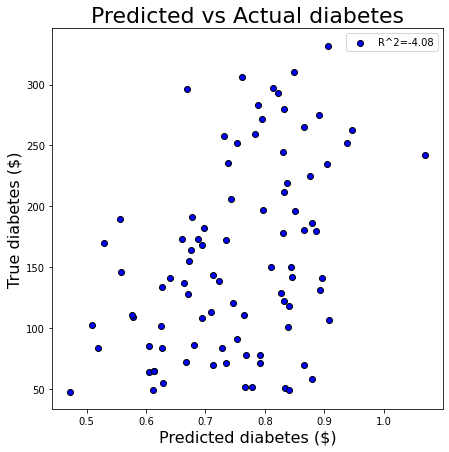

In [29]:
plot_all_observations(y_test, y_pred, y_censor_label)

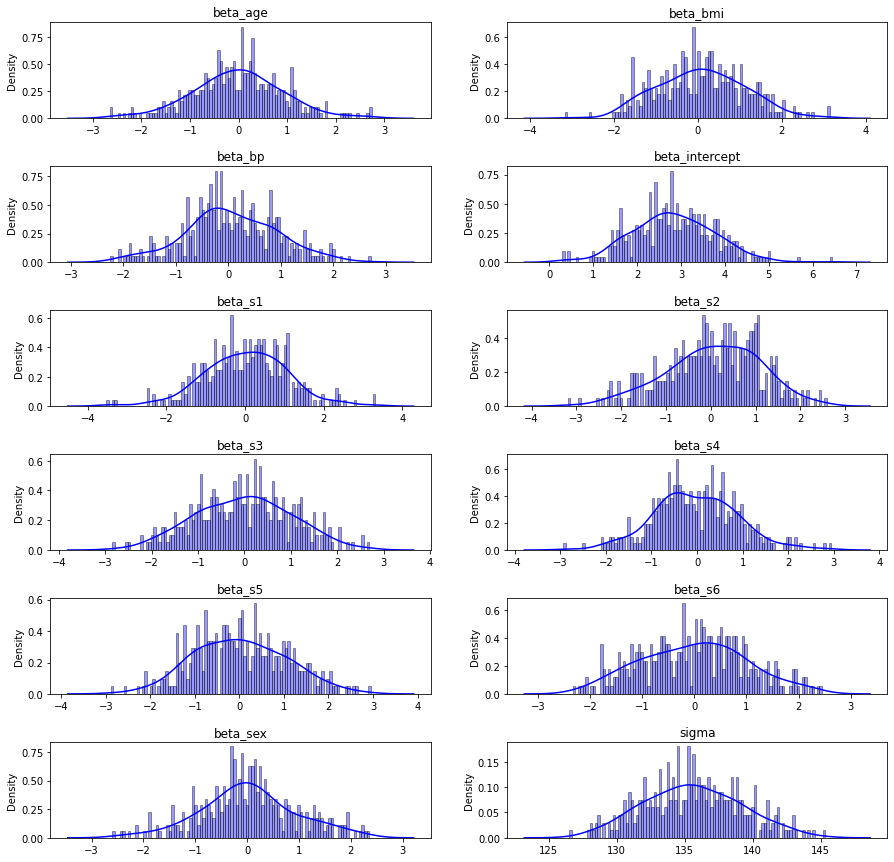

In [30]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df)